In [ ]:
###----------------
###Import Libraries
###----------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
file_path = '/content/drive/MyDrive/Genre Classification Dataset/'

data = pd.read_csv(file_path + "train_data.txt", sep=' ::: ',
                 engine='python', header=None,
                 names=['ID', 'Title', 'Genre', 'Plot'])



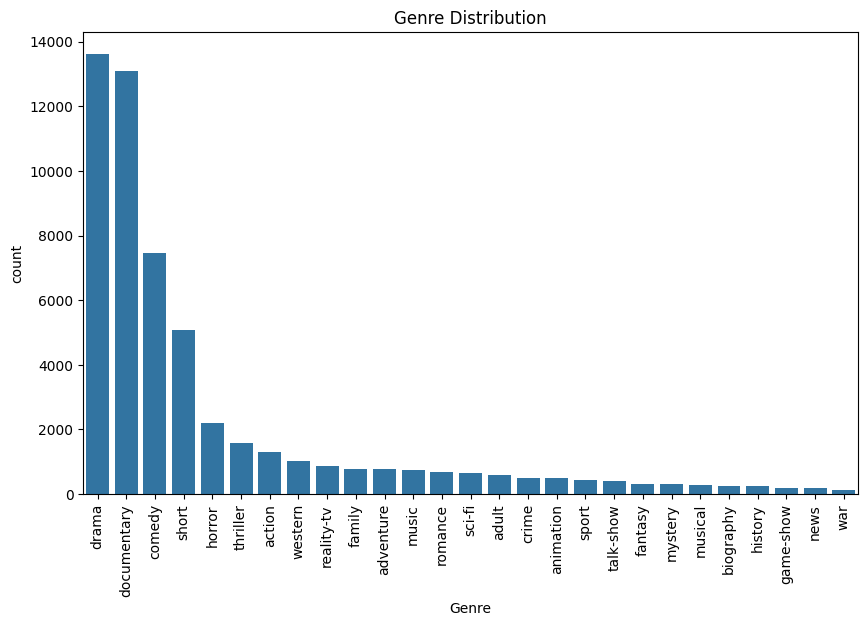

In [ ]:
# Explore the distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()


In [ ]:
# checking datapoints in each genre class.
data['Genre'].value_counts()

,count
Genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [ ]:
# Drop columns which will not put any impact on genre prediction.
data = data.drop(['ID','Title'], axis=1)

In [ ]:
# Inspect the dataset
data.head()

,Genre,Plot
0,drama,Listening in to a conversation between his doc...
1,thriller,A brother and sister with a past incestuous re...
2,adult,As the bus empties the students for their fiel...
3,drama,To help their unemployed father make ends meet...
4,drama,The film's title refers not only to the un-rec...


In [ ]:
# Check for missing values
print(data.isnull().sum())

Genre    0
Plot     0
dtype: int64


# Text Preprocessing...

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
data['Plot'] = data['Plot'].apply(preprocess_text)

In [ ]:
# Split data into features (X) and labels (y)
X = data['Plot']
y = data['Genre']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Adjust the number of features if necessary
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Trying Different models

In [ ]:
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
print("LR Results:")
evaluate_model(model, X_test_tfidf, y_test)

LR Results:
Accuracy: 0.5759476159734391
Classification Report:
               precision    recall  f1-score   support

      action       0.54      0.23      0.33       263
       adult       0.77      0.18      0.29       112
   adventure       0.46      0.15      0.23       139
   animation       0.50      0.05      0.09       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.57      0.54      1443
       crime       0.50      0.02      0.04       107
 documentary       0.66      0.85      0.74      2659
       drama       0.53      0.79      0.64      2697
      family       0.44      0.08      0.14       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.55      0.59       431
       music       0.65      0.47      0.54       144
     musical       0.33      0.02      0.04        50
     mystery    

In [ ]:
print("SVM Results:")
evaluate_model(svm_model, X_test_tfidf, y_test)

SVM Results:
Accuracy: 0.5843401272710504
Classification Report:
               precision    recall  f1-score   support

      action       0.45      0.33      0.38       263
       adult       0.72      0.41      0.52       112
   adventure       0.44      0.24      0.31       139
   animation       0.50      0.17      0.26       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.55      1443
       crime       0.27      0.04      0.07       107
 documentary       0.68      0.83      0.75      2659
       drama       0.55      0.76      0.64      2697
      family       0.33      0.10      0.15       150
     fantasy       0.38      0.04      0.07        74
   game-show       0.88      0.53      0.66        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.60      0.62       431
       music       0.63      0.57      0.60       144
     musical       0.67      0.08      0.14        50
     mystery   